In [22]:
!pip install yfinance 


In [23]:
import yfinance as yf 

In [24]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
from datetime import date, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
register_matplotlib_converters()

In [25]:
#define the ticker symbol
tickersymbol = 'INFY'


In [26]:
#get data on this ticker 
tickerData = yf.Ticker(tickersymbol)

In [27]:
#get the historical price for this ticker 
tickerDf = tickerData.history(period = '1d', start = '2015-1-1', end = '2020-1-1')

In [28]:
tickerDf = tickerDf[['Close']]

In [29]:
#see your data
tickerDf.head()

,Close
Date,
2015-01-02,6.689279
2015-01-05,6.605400
2015-01-06,6.559267
2015-01-07,6.697666
2015-01-08,6.733314


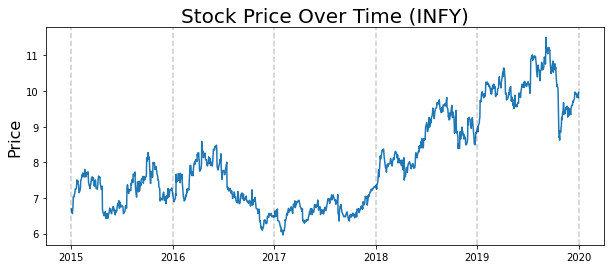

In [30]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.Close)
plt.title("Stock Price Over Time (%s)" %tickersymbol, fontsize =20)
plt.ylabel('Price', fontsize=16)
for year in range (2015,2021):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color = 'k', linestyle = '--', alpha=0.2)

##  **Stationarity: Take the first Difference of this series**


In [31]:
#take first difference
first_diffs= tickerDf.Close.values[1:] - tickerDf.Close.values[:-1]
first_diffs= np.concatenate([first_diffs,[0]])

In [32]:
#set first difference as variable in dataframe
tickerDf['FirstDifference'] = first_diffs

In [33]:
tickerDf.head()

,Close,FirstDifference
Date,,
2015-01-02,6.689279,-0.083879
2015-01-05,6.605400,-0.046133
2015-01-06,6.559267,0.138399
2015-01-07,6.697666,0.035648
2015-01-08,6.733314,0.304060


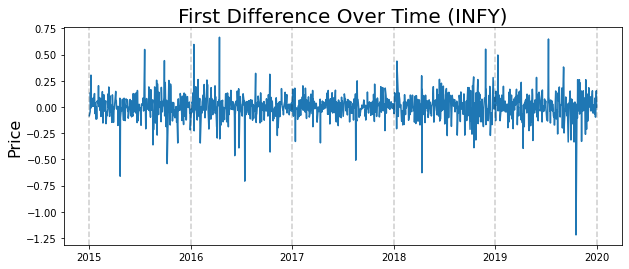

In [34]:
plt.figure(figsize=(10,4))
plt.plot(tickerDf.FirstDifference)
plt.title('First Difference Over Time (%s)'%tickersymbol, fontsize =20)
plt.ylabel('Price', fontsize=16)
for year in range (2015,2021):
    plt.axvline(pd.to_datetime(str(year)+ '-01-01'), color ='k', linestyle = '--', alpha = 0.2)

**ACF**

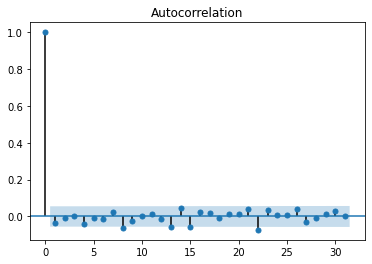

In [35]:
acf_plot = plot_acf(tickerDf.FirstDifference)

 **PACF**

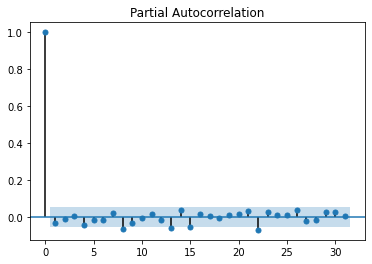

In [36]:
pacf_plot = plot_pacf(tickerDf.FirstDifference)